In [1]:
from __future__ import division
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from difflib import SequenceMatcher

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import re
import requests
from lxml import html
import time

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df=pd.read_csv('df_dr_reac.csv')
df.head()

,indi_pt,drugname,age,gndr_cod,wt,pt,target,pathway
0,osteoporosis,boniva,72.2,0.0,39.68,incorrect drug administration duration,Farnesyl pyrophosphate synthase,Ibandronate Action Pathway
1,osteoporosis,boniva,72.2,0.0,39.68,incorrect drug administration duration,Hydroxylapatite,Ibandronate Action Pathway
2,osteoporosis,boniva,72.2,0.0,39.68,product odour abnormal,Farnesyl pyrophosphate synthase,Ibandronate Action Pathway
3,osteoporosis,boniva,72.2,0.0,39.68,product odour abnormal,Hydroxylapatite,Ibandronate Action Pathway
4,osteoporosis,boniva,72.2,0.0,39.68,vomiting,Farnesyl pyrophosphate synthase,Ibandronate Action Pathway


In [3]:
len(df)

10755993

In [4]:
indi_li=df['indi_pt'].value_counts().head(20).index.tolist()
indi_li.remove('product used for unknown indication')
indi_li.remove('drug use for unknown indication')
indi_li

['pulmonary arterial hypertension',
 'osteoporosis',
 'osteopenia',
 'prophylaxis',
 'anaemia',
 'supplementation therapy',
 'mineral supplementation',
 'pain',
 'pulmonary hypertension',
 'insomnia',
 'vitamin supplementation',
 'cor pulmonale chronic',
 'depression',
 'hypertension',
 'sleep disorder',
 'medical diet',
 'muscle spasms',
 'breast cancer']

In [7]:
df2=df[df['indi_pt'].isin(indi_li)].reset_index(drop=True)
df2=df2.drop_duplicates()
df2.head()

,indi_pt,drugname,age,gndr_cod,wt,pt,target,pathway
0,osteoporosis,boniva,72.2,0.0,39.68,incorrect drug administration duration,Farnesyl pyrophosphate synthase,Ibandronate Action Pathway
1,osteoporosis,boniva,72.2,0.0,39.68,incorrect drug administration duration,Hydroxylapatite,Ibandronate Action Pathway
2,osteoporosis,boniva,72.2,0.0,39.68,product odour abnormal,Farnesyl pyrophosphate synthase,Ibandronate Action Pathway
3,osteoporosis,boniva,72.2,0.0,39.68,product odour abnormal,Hydroxylapatite,Ibandronate Action Pathway
4,osteoporosis,boniva,72.2,0.0,39.68,vomiting,Farnesyl pyrophosphate synthase,Ibandronate Action Pathway


In [8]:
len(df2)

3345681

In [12]:
pt_li=df2['pt'].value_counts().head(30).index.tolist()
pt_li.remove('no reaction')
pt_li.remove('drug ineffective')
pt_li

['nausea',
 'diarrhoea',
 'dyspnoea',
 'headache',
 'vomiting',
 'pneumonia',
 'dizziness',
 'fatigue',
 'fall',
 'pain',
 'pain in extremity',
 'weight decreased',
 'malaise',
 'cough',
 'arthralgia',
 'pyrexia',
 'insomnia',
 'back pain',
 'anaemia',
 'abdominal pain',
 'anxiety',
 'hypertension',
 'depression',
 'asthenia',
 'weight increased',
 'chest pain',
 'device related infection',
 'hypotension']

In [13]:
df3=df2[df2['pt'].isin(pt_li)].reset_index(drop=True)
df3.head()

,indi_pt,drugname,age,gndr_cod,wt,pt,target,pathway
0,osteoporosis,boniva,72.20,0.0,39.68,vomiting,Farnesyl pyrophosphate synthase,Ibandronate Action Pathway
1,osteoporosis,boniva,72.20,0.0,39.68,vomiting,Hydroxylapatite,Ibandronate Action Pathway
2,osteoporosis,bonviva,57.00,0.0,65.00,hypertension,Farnesyl pyrophosphate synthase,Ibandronate Action Pathway
3,osteoporosis,bonviva,57.00,0.0,65.00,hypertension,Hydroxylapatite,Ibandronate Action Pathway
4,osteopenia,boniva,84.69,1.0,68.10,fatigue,Farnesyl pyrophosphate synthase,Ibandronate Action Pathway


In [14]:
len(df3)

655953

In [15]:
dummy_col = pd.get_dummies(df3[['indi_pt','target','pathway']])
df4=df3.drop(['indi_pt','target','pathway','drugname'] , axis=1)
df4 = pd.concat([df4, dummy_col], axis=1)
df4.head()
#X=dr5_c.drop(['sepsis'], axis=1)
#y=dr5_c['sepsis']

,age,gndr_cod,wt,pt,indi_pt_anaemia,indi_pt_breast cancer,indi_pt_cor pulmonale chronic,indi_pt_depression,indi_pt_hypertension,indi_pt_insomnia,...,pathway_Ximelagatran Action Pathway,pathway_Zidovudine Action Pathway,pathway_Zoledronate Action Pathway,pathway_beta-Alanine Metabolism,pathway_beta-Mercaptolactate-Cysteine Disulfiduria,pathway_beta-Ureidopropionase Deficiency,pathway_gamma-Glutamyltransferase Deficiency,pathway_gamma-Glutamyltranspeptidase Deficiency,pathway_tRNA Charging,pathway_tRNA Charging 2
0,72.20,0.0,39.68,vomiting,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,72.20,0.0,39.68,vomiting,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,57.00,0.0,65.00,hypertension,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57.00,0.0,65.00,hypertension,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,84.69,1.0,68.10,fatigue,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df4['pt']=df4['pt'].astype("category").cat.codes
df4['pt'].head()

0    25
1    25
2    16
3    16
4    14
Name: pt, dtype: int8

In [17]:
X=df4.drop(['pt'], axis=1)
y=df4['pt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [18]:
clf1 = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=0, oob_score=True)    #building 50 decision trees
clf1.fit(X_train, y_train)
print("(pt) model")
print("oob score:"), clf1.oob_score_
print (metrics.accuracy_score(y_test, clf1.predict(X_test)))

print (metrics.confusion_matrix(y_test, clf1.predict(X_test)))
print ("=======================================================")

(pt) model
oob score: 0.22069623943806907
0.2244742398487701
[[ 406   34  273   71  155   76  657   27  240    8  329   11  219   35
    84  136   41   82   79   47  197   64  112   62   23   48   23   19]
 [  21  888   88   62   94   47   55  197  159  180  210   31  107  169
   116   22   84  105   55   35   65  123   65  156   97  351   37   21]
 [ 249   55  359  131   88  103  144   40  492   20   28   49   26   93
    69   43  126   52  146  249  105  228   81   23   30  200  142   97]
 [ 119   62  256  867   62  301  100   49  421   10   24   36   29  108
   188   55  172   35   91   62   32  273  151   30  223   35   71   85]
 [ 147   80   62   26  411   51  218   17  104    8  102  188  136  106
    94  145  150  122  203  110  140  105   46   28  108   68  141   47]
 [ 107   53  146  310   72  913  234   37  145    9   22   23   51   85
    70   59  109   31   61   40   45  108   91  182  514   16  103   64]
 [ 632   36  108   55  228  183  382   19   95  173   10  181  133   

In [22]:
print (metrics. f1_score(y_test, clf1.predict(X_test), average='weighted'))

0.2297518060454298


## Extracting outliers

### Plot the data into 2 dimensional graph

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

In [28]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(655953, 1445)
(655953L, 2L)


TypeError: You must first set_array for mappable

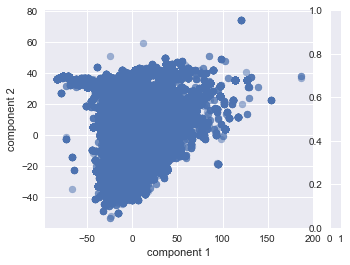

In [30]:
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

### Clustering to find outliers

In [24]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [25]:
cluster_df=df4.drop(['pt'], axis=1)

Text(0.5,1,'Selecting k with the Elbow Method')

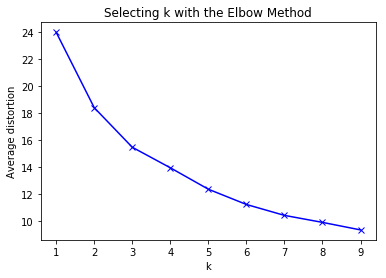

In [26]:
K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method')

In [31]:
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)
k_means.fit(cluster_df)
df_s1 = pd.DataFrame(k_means.labels_, columns = ['Cluster'])
X_total=pd.concat([cluster_df,df_s1], axis=1)

In [32]:
X_total['Cluster'].value_counts()

1    313526
0    205731
2    136696
Name: Cluster, dtype: int64

In [33]:
X_total=pd.concat([X_total,df4['pt']], axis=1)
df5=X_total[X_total['Cluster']!=2]

In [35]:
X=df5.drop(['pt'], axis=1)
y=df5['pt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [36]:
clf2 = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=0, oob_score=True)    #building 50 decision trees
clf2.fit(X_train, y_train)
print("(pt) model")
print("oob score:"), clf2.oob_score_
print (metrics.accuracy_score(y_test, clf2.predict(X_test)))

print (metrics.confusion_matrix(y_test, clf2.predict(X_test)))
print ("=======================================================")

(pt) model
oob score: 0.23866828757477643
0.24009166891345377
[[ 342   19  276   54   98   91  530   32  214    3   38    8  191   27
    61  139   29   63   63   33  146   26   96   49   40   61   20    9]
 [  31  786   74   57   41   70   52   41  111  194  161   21   74   98
    87   15   66   28   21   15   55   60   37  172   86  469   19   22]
 [ 259   42  280   98   59  134  123   49  416    6   20   47   27   76
    27   43   88   43  112   58  114  214   48   15   52   62  121  108]
 [ 142   50  238  675   56  337  101   58  283   12   23   41   33   92
   114   57  106   31   68   42   26  256  142   22  161   39   64   64]
 [  85   24   53   31  415   51  172   19   76    5   69  144  137   73
    67   14  147   93  102  130  124   56   33   35  157   43  156   40]
 [  75   43  146  245   68  645  212   54  113    7   19   21   21   57
    60   39  118   31   44   29   30   82   81   20  150    4  108   39]
 [ 548   39  119   28  155  209  291   27   66  173    8   18   96  

In [37]:
print (metrics. f1_score(y_test, clf2.predict(X_test), average='weighted'))

0.24749559788951947


In [38]:
from sklearn.multiclass import OneVsRestClassifier
clf2 = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=0)    #building 50 decision trees
clf3=OneVsRestClassifier(clf2)
clf3.fit(X_train, y_train)
print("(pt) model")
#print("oob score:"), clf2.oob_score_
print (metrics.accuracy_score(y_test, clf3.predict(X_test)))

print (metrics.confusion_matrix(y_test, clf3.predict(X_test)))
print ("=======================================================")
print (metrics. f1_score(y_test, clf3.predict(X_test), average='weighted'))

KeyboardInterrupt: 